<h1 style="text-align: center;">Deep Learning<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [221]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [222]:
df = pd.read_csv("Churn_Modelling.csv")

In [223]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [224]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [225]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6823,6824,15708265,Chibugo,581,Spain,Female,24,10,159203.710,1,1,1,102517.830,1
9402,9403,15674156,Tretiakova,810,Germany,Male,69,3,27288.430,1,1,1,110509.900,0
6328,6329,15629545,Buckley,790,Spain,Female,41,7,109508.680,1,0,0,86776.380,0
4755,4756,15740072,Padovesi,720,France,Female,37,2,120328.880,2,1,1,138470.210,0
250,251,15628112,Hughes,771,Germany,Female,36,5,77846.900,1,0,0,99805.990,0
5213,5214,15783752,Lindsay,752,Germany,Male,29,4,129514.990,1,1,1,102930.460,0
1190,1191,15636935,Rischbieth,797,France,Female,29,1,0.000,2,1,1,132975.390,0
6033,6034,15759966,Chiemenam,612,Spain,Female,36,5,119799.270,2,1,0,159416.580,0
7485,7486,15744423,Cocci,561,France,Male,32,5,0.000,2,1,0,84871.990,0
2383,2384,15642468,Clark,697,France,Male,42,9,132739.260,2,0,0,174667.650,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [226]:
df.shape

(10000, 14)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [228]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [229]:
df.isnull().sum().any()

False

In [230]:
df.duplicated().sum()

0

In [231]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [232]:
df_numeric = df.select_dtypes(exclude="O")
df_numeric.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [233]:
df_categoric = df.select_dtypes(include="O")
df_categoric.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [234]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [235]:
# drop 'RowNumber', 'CustomerId', 'Surname' columns

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [236]:
df.shape

(10000, 11)

0    7963
1    2037
Name: Exited, dtype: int64


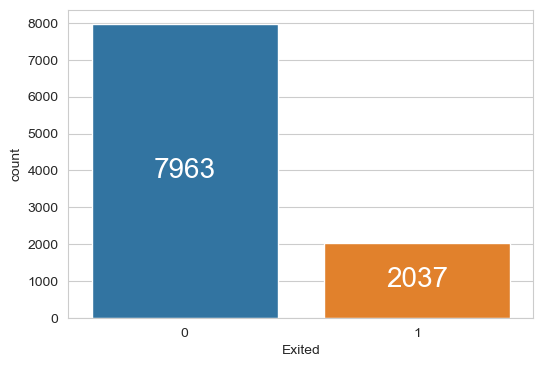

In [237]:
# target feature
# Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.
# Target class is 1. So we will use recall as a metric. 
print(df.Exited.value_counts())
plt.figure(figsize=(6,4))
ax = sns.countplot(df["Exited"])
ax.bar_label(container=ax.containers[0], color="white", fontsize=20, label_type="center");

> It seems as imbalanced data but we will decide this after looking at recall metric. 

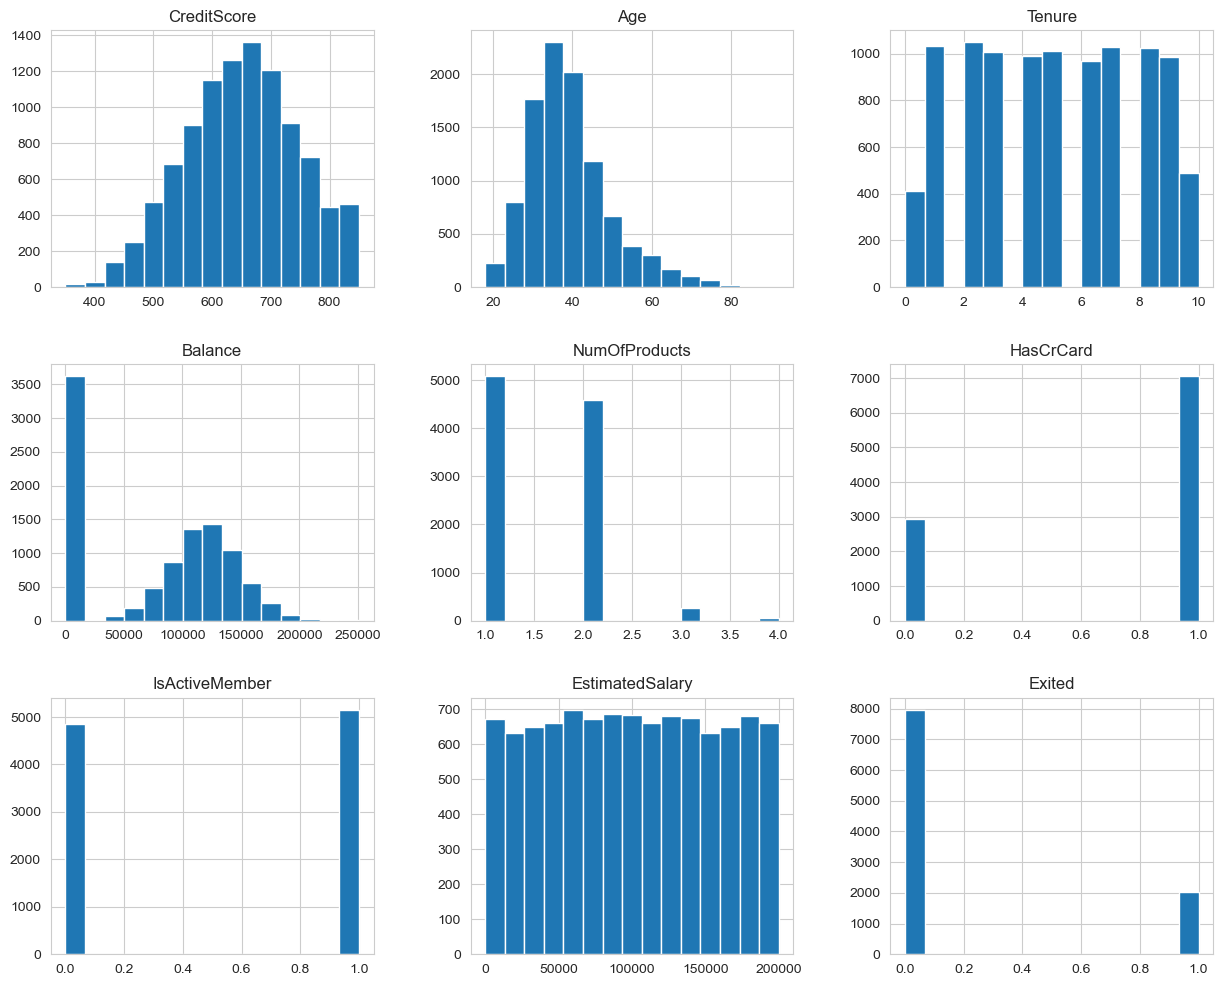

In [238]:
df.hist(figsize=(15, 12), bins=15);

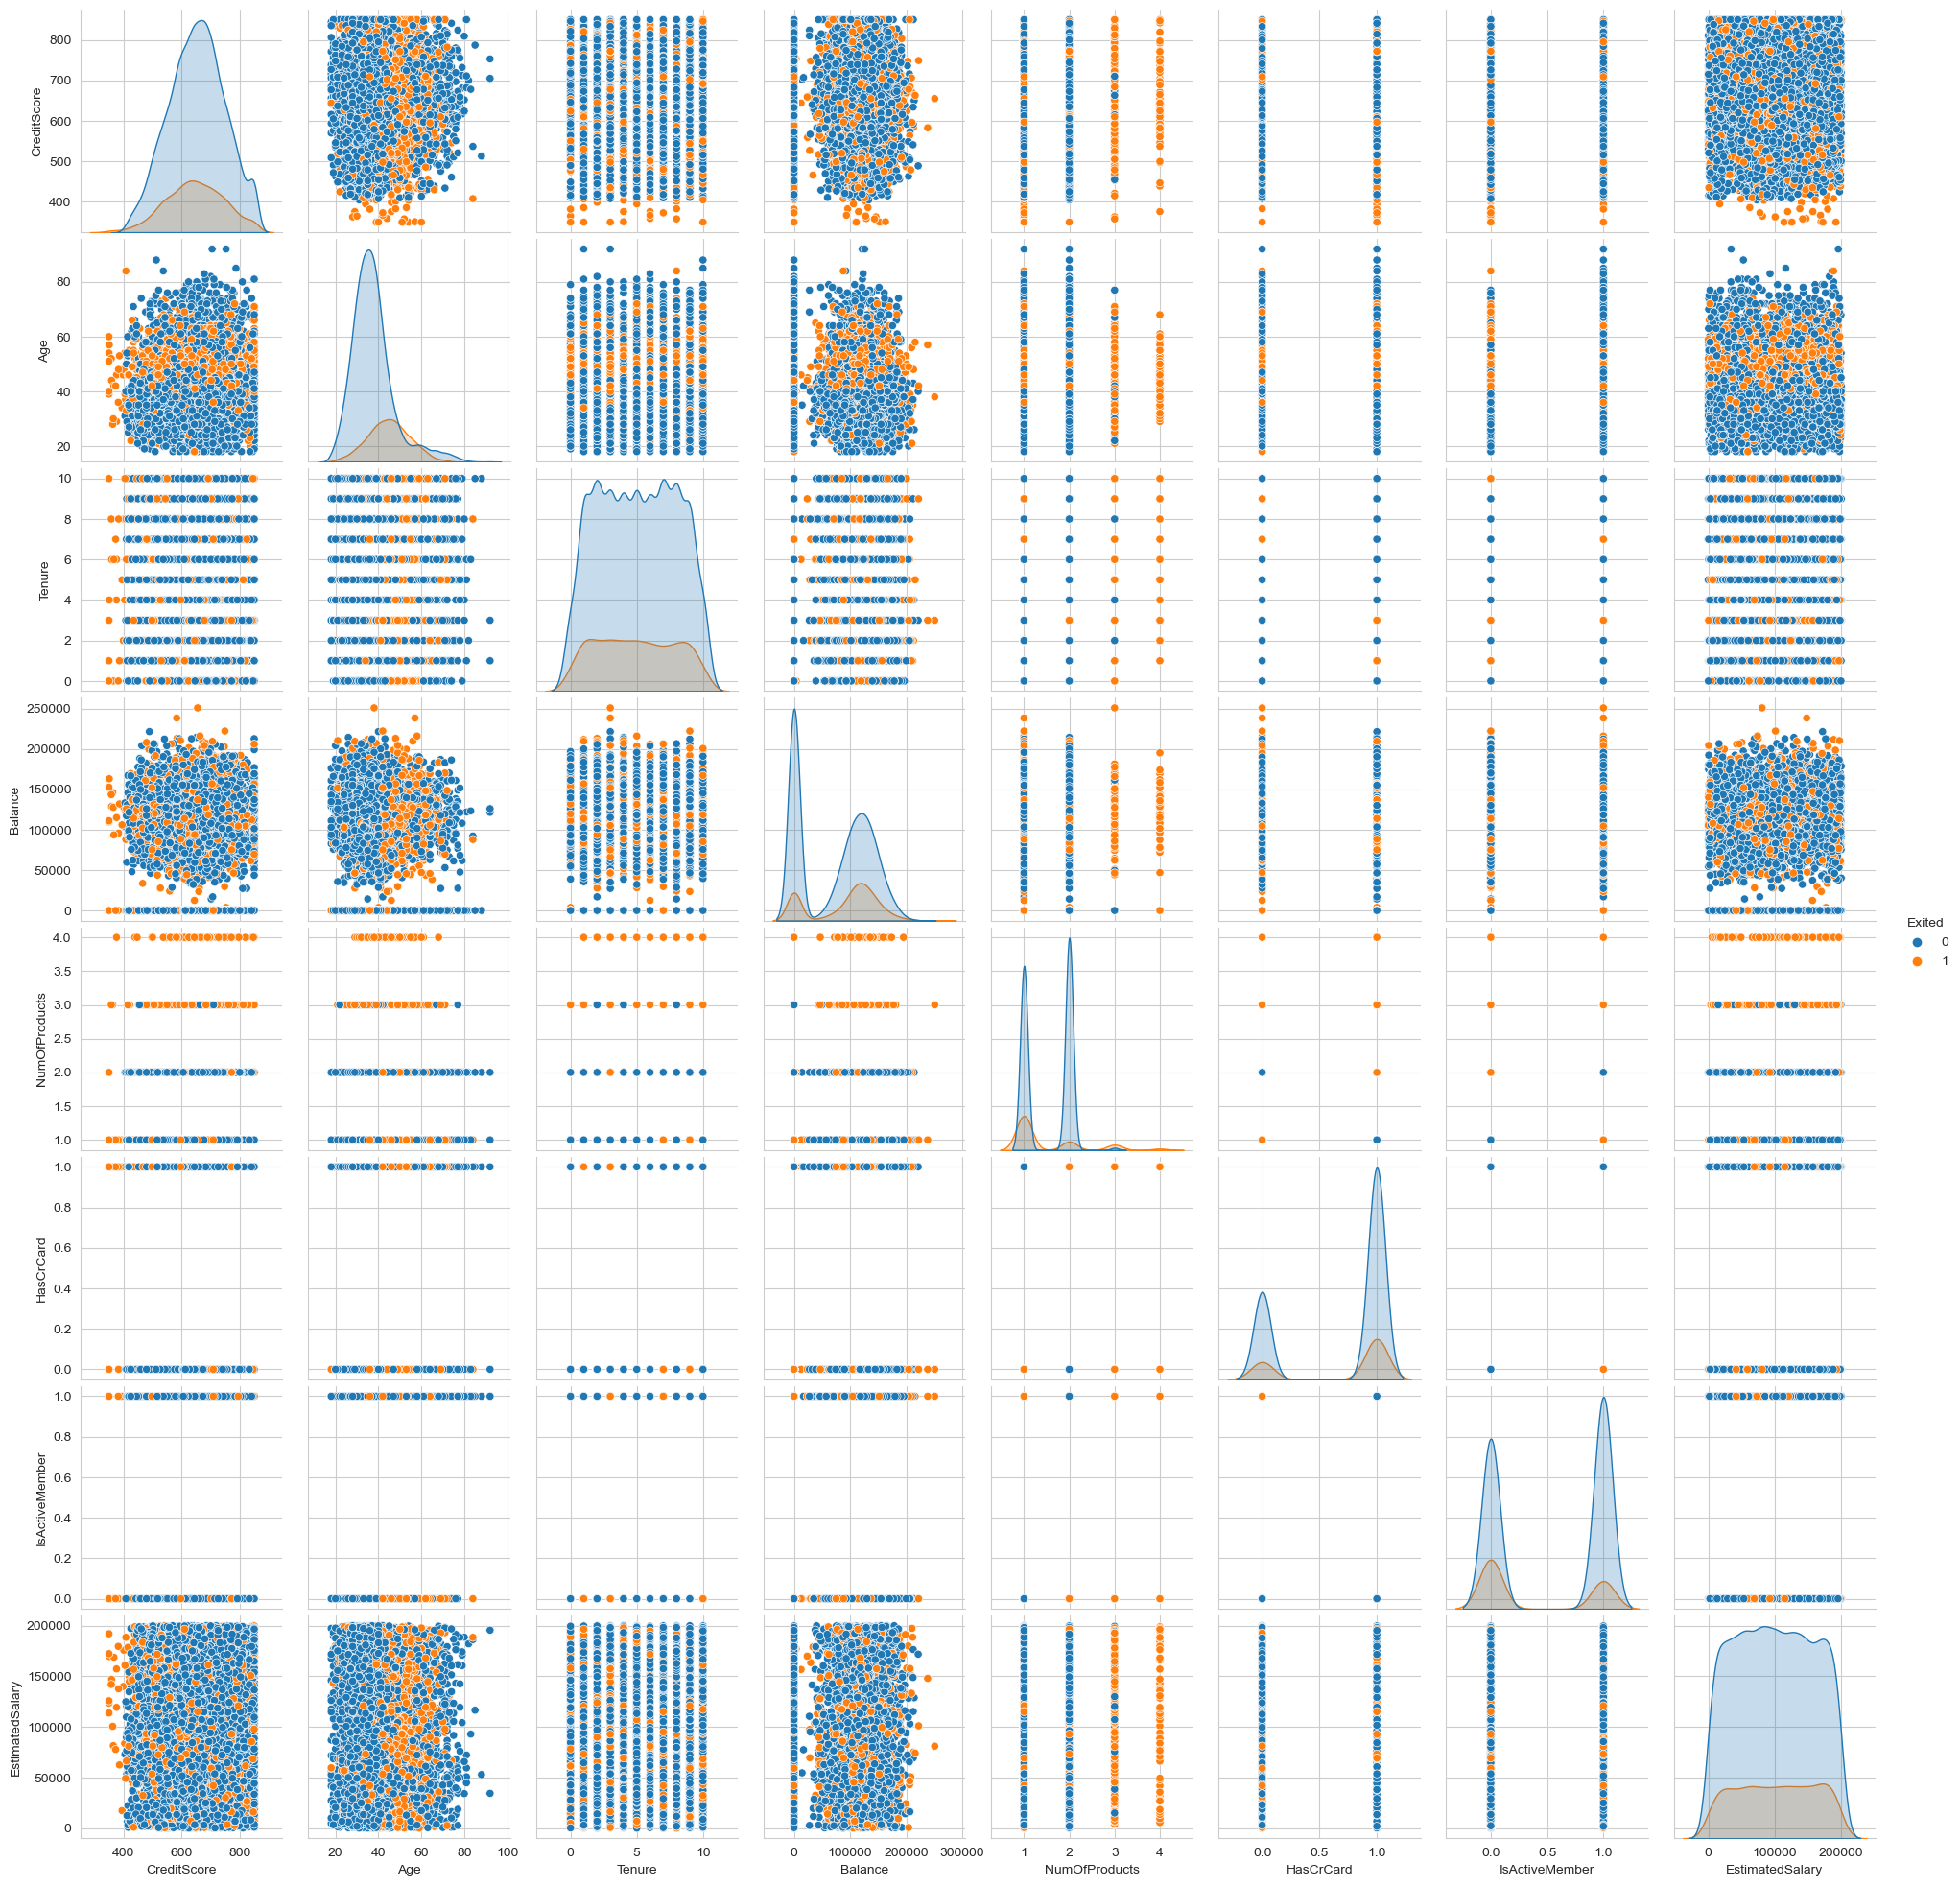

In [239]:
sns.pairplot(df, hue= "Exited")
plt.show()

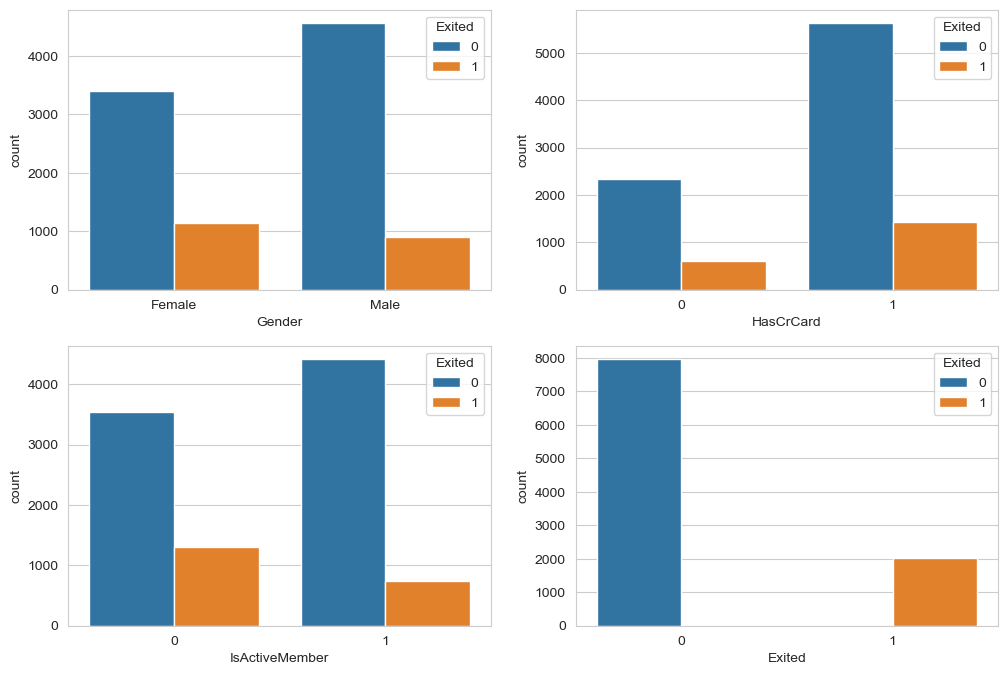

In [240]:
binary_columns = []
for i in df.columns:
    if len(df[i].value_counts().index)==2 :
        binary_columns.append(i)

index = 0
plt.figure(figsize=(12, 8))
for i in binary_columns:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")
    

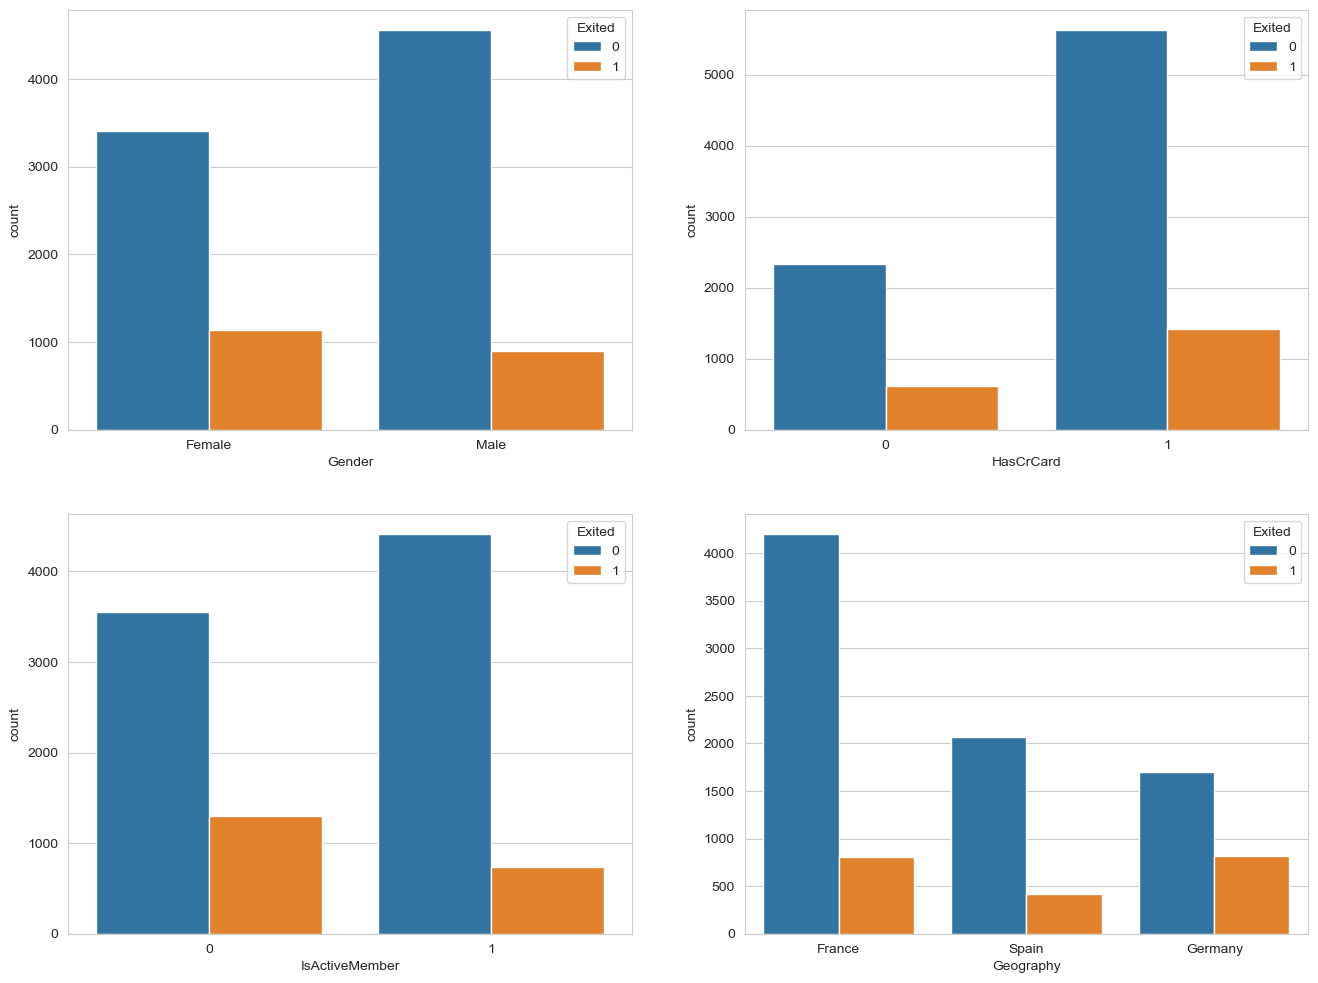

In [241]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

In [242]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


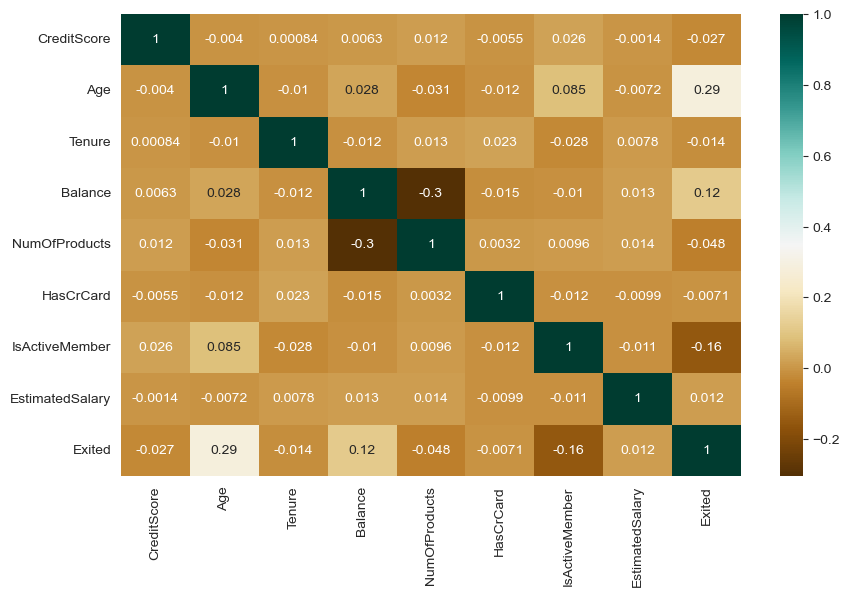

In [243]:
sns.heatmap(df.corr(), annot=True,cmap='BrBG')
plt.show()

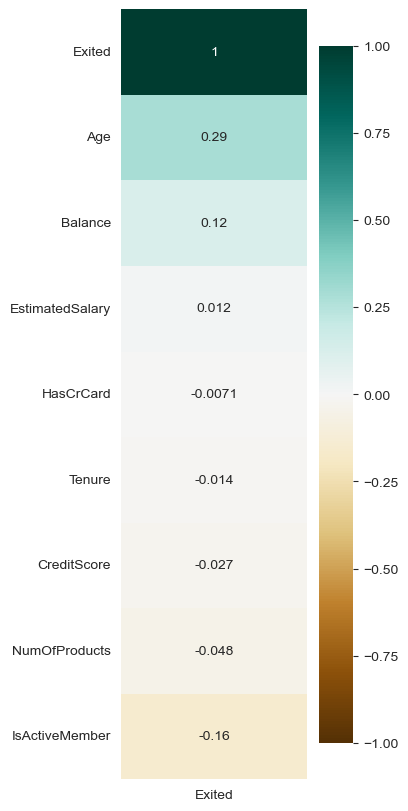

In [244]:
plt.figure(figsize=(3,10))
sns.heatmap(df.corr()[["Exited"]].sort_values(by='Exited', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG');

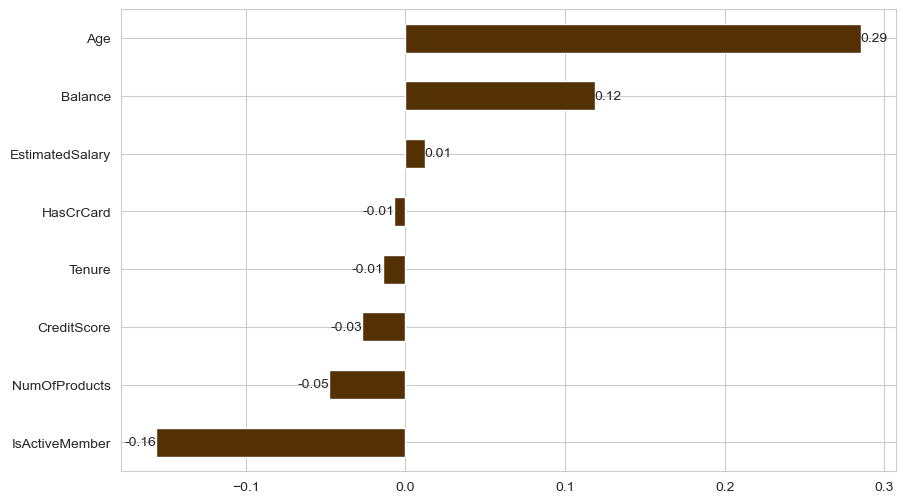

In [245]:
ax = df.corr()["Exited"].sort_values(ascending=True)[:-1].plot(kind="barh",cmap="BrBG")
ax.bar_label(container=ax.containers[0], fmt="%.2f");
plt.show()

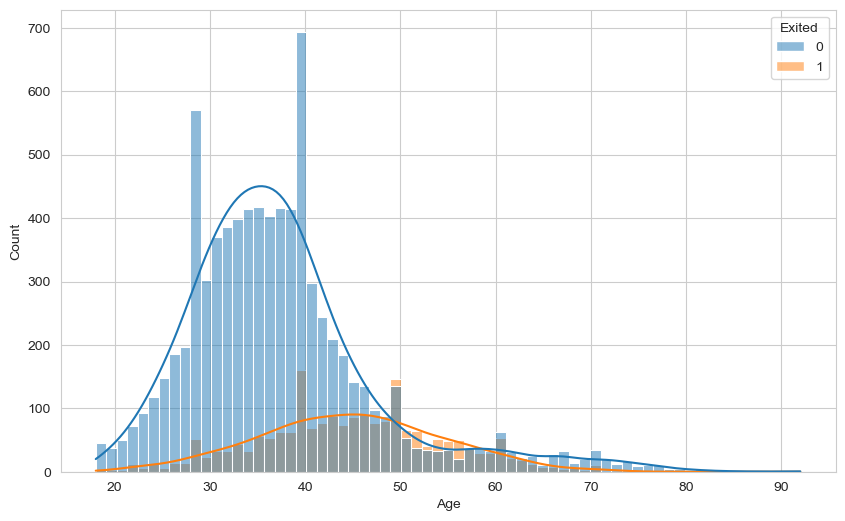

In [246]:
sns.histplot(data = df, x = "Age", hue = "Exited", fill=True, kde=True);

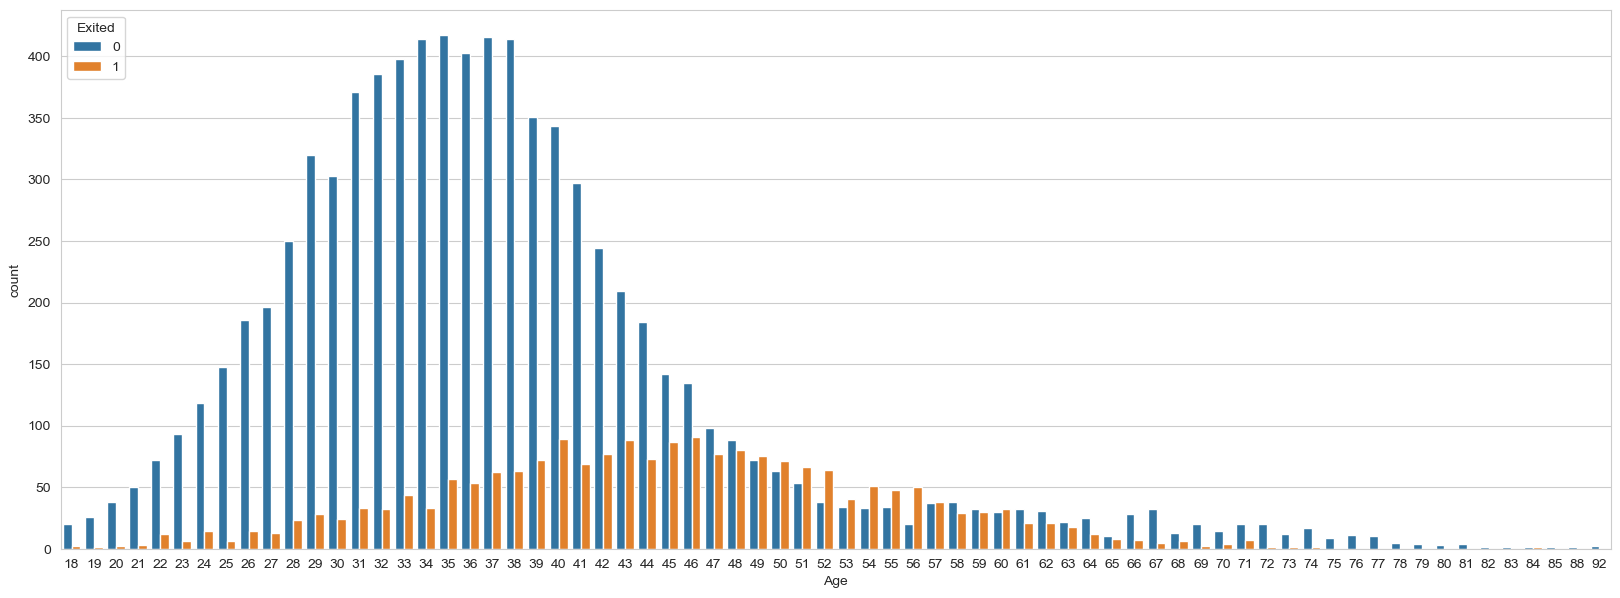

In [247]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

In [248]:
df.shape

(10000, 11)

In [249]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [250]:
df_dummy.shape

(10000, 12)

# Preprocessing of Data

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [252]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [253]:
seed = 42

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = seed)

In [255]:
from sklearn.compose import make_column_transformer

In [256]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [257]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [258]:
X_train.shape, X_test.shape

((9000, 13), (1000, 13))

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [259]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [260]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer = opt,
              loss = "binary_crossentropy",
              metrics = ["Recall"])

In [261]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1)
# validation_data = Data on which to evaluate
#         the loss and any model metrics at the end of each epoch.
#         The model will not be trained on this data.

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.5451 - recall: 6.0533e-04 - val_loss: 0.4984 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4878 - recall: 0.0000e+00 - val_loss: 0.4621 - val_recall: 0.0166
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4677 - recall: 0.0339 - val_loss: 0.4430 - val_recall: 0.0497
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4535 - recall: 0.0690 - val_loss: 0.4240 - val_recall: 0.1215
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4416 - recall: 0.1356 - val_loss: 0.4129 - val_recall: 0.1381
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4301 - recall: 0.1604 - val_loss: 0.3995 - val_recall: 0.1713
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4202 - recall: 0.2173 - val_loss: 0.3856 - val_recall: 0.2873
Epoch 8/300
64/64 [==========

64/64 [==============================] - 0s 2ms/step - loss: 0.3216 - recall: 0.4824 - val_loss: 0.2951 - val_recall: 0.5580
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3221 - recall: 0.4861 - val_loss: 0.2943 - val_recall: 0.5470
Epoch 121/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3220 - recall: 0.4921 - val_loss: 0.2937 - val_recall: 0.5746
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3237 - recall: 0.4921 - val_loss: 0.2954 - val_recall: 0.5083
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3228 - recall: 0.4800 - val_loss: 0.2949 - val_recall: 0.5304
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.4958 - val_loss: 0.2977 - val_recall: 0.5193
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3231 - recall: 0.4952 - val_loss: 0.2931 - val_recall: 0.5249
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.5085 - val_loss: 0.3004 - val_recall: 0.6022
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3146 - recall: 0.5030 - val_loss: 0.3021 - val_recall: 0.4972
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3127 - recall: 0.5103 - val_loss: 0.3012 - val_recall: 0.5967
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3138 - recall: 0.5097 - val_loss: 0.2974 - val_recall: 0.5801
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3142 - recall: 0.5085 - val_loss: 0.2928 - val_recall: 0.5249
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3129 - recall: 0.5139 - val_loss: 0.2953 - val_recall: 0.5691
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3126 - recall: 0.5073 - val_loss: 0.2959 - val_recall: 0.5801
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3062 - recall: 0.5236 - val_loss: 0.3034 - val_recall: 0.5028
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3073 - recall: 0.5176 - val_loss: 0.2992 - val_recall: 0.6077
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3069 - recall: 0.5212 - val_loss: 0.3049 - val_recall: 0.5525
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3067 - recall: 0.5224 - val_loss: 0.3000 - val_recall: 0.5470
Epoch 241/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3056 - recall: 0.5236 - val_loss: 0.3040 - val_recall: 0.5138
Epoch 242/300
64/64 [==============================] - 0s 4ms/step - loss: 0.3064 - recall: 0.5188 - val_loss: 0.3020 - val_recall: 0.5083
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3055 - recall: 0.5218 - val_loss: 0.3017 - val_recall: 0.6243
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2991 - recall: 0.5266 - val_loss: 0.3032 - val_recall: 0.5912
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3015 - recall: 0.5291 - val_loss: 0.3134 - val_recall: 0.6133
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3006 - recall: 0.5393 - val_loss: 0.3050 - val_recall: 0.5691
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.2990 - recall: 0.5454 - val_loss: 0.3034 - val_recall: 0.5138
Epoch 300/300
64/64 [==============================] - 0s 3ms/step - loss: 0.2990 - recall: 0.5412 - val_loss: 0.3089 - val_recall: 0.5193


In [262]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                448       
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (Dense)            (None, 8)                 136       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


### About model

In [263]:
model.dtype

'float32'

In [264]:
model.history

In [265]:
model.history.history

{'loss': [0.5451130867004395,
  0.4878443479537964,
  0.46773281693458557,
  0.4535033106803894,
  0.44155389070510864,
  0.4300992488861084,
  0.4201548397541046,
  0.4119054973125458,
  0.40292540192604065,
  0.3950589895248413,
  0.3857724666595459,
  0.3805130422115326,
  0.37198054790496826,
  0.3683110177516937,
  0.3641224801540375,
  0.3608842194080353,
  0.357200562953949,
  0.3546837568283081,
  0.3539043366909027,
  0.3531935513019562,
  0.35078251361846924,
  0.3503018915653229,
  0.34890538454055786,
  0.34913983941078186,
  0.345839262008667,
  0.34625405073165894,
  0.3456704318523407,
  0.34917667508125305,
  0.34445711970329285,
  0.3432217538356781,
  0.34361207485198975,
  0.3422975242137909,
  0.34072357416152954,
  0.3421459197998047,
  0.34201160073280334,
  0.34044355154037476,
  0.3410089313983917,
  0.3398400843143463,
  0.3390684127807617,
  0.3387185335159302,
  0.3378254473209381,
  0.3395078778266907,
  0.33701714873313904,
  0.336749792098999,
  0.33661499

In [266]:
type(model.history.history)

dict

In [267]:
model.history.history.keys()

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])

In [268]:
len(model.history.history["loss"])

300

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check Precision-recall curve for the model (Because of imbalanced data)

In [269]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.545,0.001,0.498,0.000
1,0.488,0.000,0.462,0.017
2,0.468,0.034,0.443,0.050
3,0.454,0.069,0.424,0.122
4,0.442,0.136,0.413,0.138
...,...,...,...,...
295,0.299,0.527,0.303,0.591
296,0.301,0.529,0.313,0.613
297,0.301,0.539,0.305,0.569
298,0.299,0.545,0.303,0.514


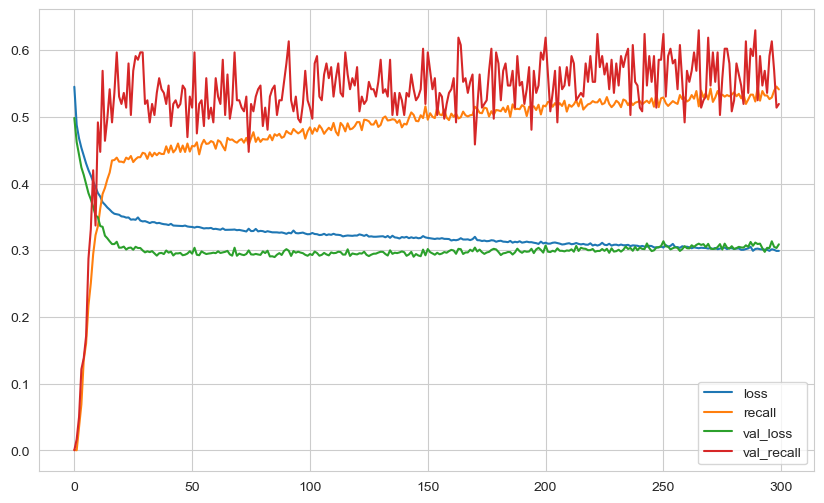

In [270]:
loss_df.plot()
plt.show()

In [271]:
model.evaluate(X_test, y_test, verbose=0)  # Returns the loss value & metrics values for the model in test mode.

[0.340029776096344, 0.4264705777168274]

In [272]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.340029776096344
recall :  0.4264705777168274


In [273]:
y_pred = model.predict(X_test) > 0.5  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[769  27]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       796
           1       0.76      0.43      0.55       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



> The target class's recall is too low. Now we can say that there is an imbalance of data here.

32/32 [==============================] - 0s 2ms/step


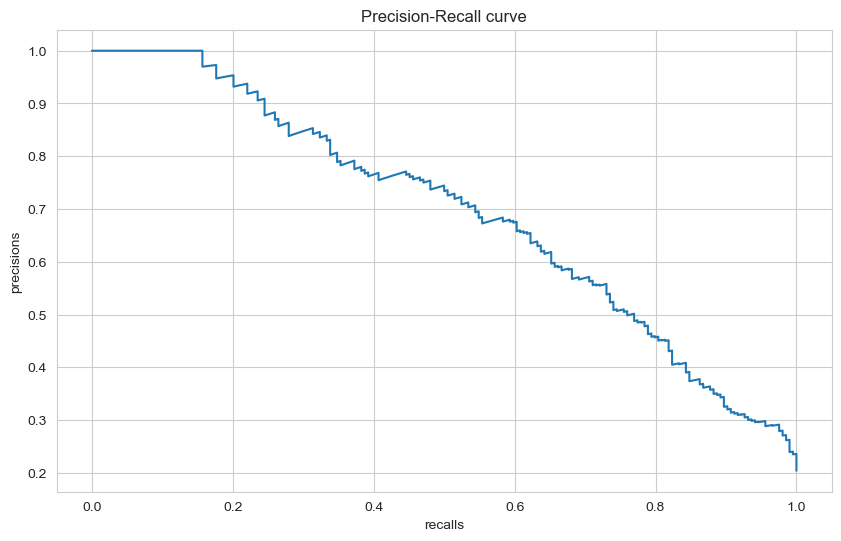

In [274]:
y_pred_proba = model.predict(X_test)  # generates probability
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [275]:
# thresholds

In [276]:
average_precision_score(y_test, y_pred_proba)

0.6948903937605659

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [277]:
# defining class_weights

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [278]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer = opt,
              loss = "binary_crossentropy",
              metrics = ["Recall"])

In [279]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6955 - recall: 0.7724 - val_loss: 0.7028 - val_recall: 0.6630
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6788 - recall: 0.7312 - val_loss: 0.7132 - val_recall: 0.7293
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6641 - recall: 0.7343 - val_loss: 0.6923 - val_recall: 0.7072
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6470 - recall: 0.7016 - val_loss: 0.6627 - val_recall: 0.6961
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6282 - recall: 0.6628 - val_loss: 0.6234 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6096 - recall: 0.6634 - val_loss: 0.5693 - val_recall: 0.6409
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5946 - recall: 0.6798 - val_loss: 0.5953 - val_recall: 0.7348
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4391 - recall: 0.7791 - val_loss: 0.4137 - val_recall: 0.8122
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4378 - recall: 0.7815 - val_loss: 0.4126 - val_recall: 0.8066
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4380 - recall: 0.7778 - val_loss: 0.4621 - val_recall: 0.8343
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4431 - recall: 0.7851 - val_loss: 0.3803 - val_recall: 0.7845
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4386 - recall: 0.7791 - val_loss: 0.4066 - val_recall: 0.7956
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4367 - recall: 0.7803 - val_loss: 0.4097 - val_recall: 0.7956
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4382 - recall: 0.7857 - val_loss: 0.3891 - val_recall: 0.7901
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4325 - recall: 0.7827 - val_loss: 0.4587 - val_recall: 0.8122
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4301 - recall: 0.7809 - val_loss: 0.3935 - val_recall: 0.7901
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4300 - recall: 0.7900 - val_loss: 0.4376 - val_recall: 0.8066
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4284 - recall: 0.7918 - val_loss: 0.4243 - val_recall: 0.8122
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4306 - recall: 0.7887 - val_loss: 0.3822 - val_recall: 0.7735
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4289 - recall: 0.7839 - val_loss: 0.4170 - val_recall: 0.8122
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4283 - recall: 0.7893 - val_loss: 0.4089 - val_recall: 0.7956
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4235 - recall: 0.7984 - val_loss: 0.3763 - val_recall: 0.7624
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4255 - recall: 0.7900 - val_loss: 0.4303 - val_recall: 0.8232
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4219 - recall: 0.7930 - val_loss: 0.4273 - val_recall: 0.7901
Epoch 240/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4225 - recall: 0.7948 - val_loss: 0.3869 - val_recall: 0.7790
Epoch 241/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4226 - recall: 0.7936 - val_loss: 0.4160 - val_recall: 0.7901
Epoch 242/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4222 - recall: 0.7978 - val_loss: 0.3680 - val_recall: 0.7514
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4232 - recall: 0.7881 - val_loss: 0.4547 - val_recall: 0.8232
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4168 - recall: 0.7966 - val_loss: 0.4217 - val_recall: 0.7956
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4171 - recall: 0.7942 - val_loss: 0.4209 - val_recall: 0.7956
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4158 - recall: 0.7966 - val_loss: 0.3950 - val_recall: 0.7790
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4150 - recall: 0.8002 - val_loss: 0.3959 - val_recall: 0.7735
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4152 - recall: 0.7954 - val_loss: 0.4130 - val_recall: 0.7790


In [280]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                448       
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dense_50 (Dense)            (None, 8)                 136       
                                                                 
 dense_51 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [281]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.695,0.772,0.703,0.663
1,0.679,0.731,0.713,0.729
2,0.664,0.734,0.692,0.707
3,0.647,0.702,0.663,0.696
4,0.628,0.663,0.623,0.729
...,...,...,...,...
295,0.417,0.797,0.422,0.796
296,0.417,0.794,0.421,0.796
297,0.416,0.797,0.395,0.779
298,0.415,0.800,0.396,0.773


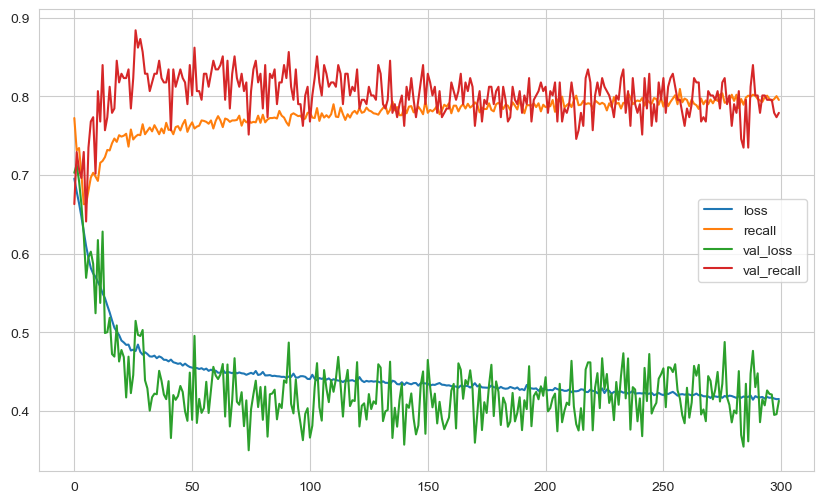

In [282]:
loss_df.plot()
plt.show()

In [283]:
model.evaluate(X_test, y_test, verbose=0)

[0.45856544375419617, 0.7647058963775635]

In [284]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.45856544375419617
recall :  0.7647058963775635


> When we use the class_weight parameter, we see that the loss value decreases and the recall increases, which is desired.

In [285]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  # target class is 1. 

32/32 [==============================] - 0s 1ms/step
[[630 166]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.76      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.79      0.80      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 968us/step


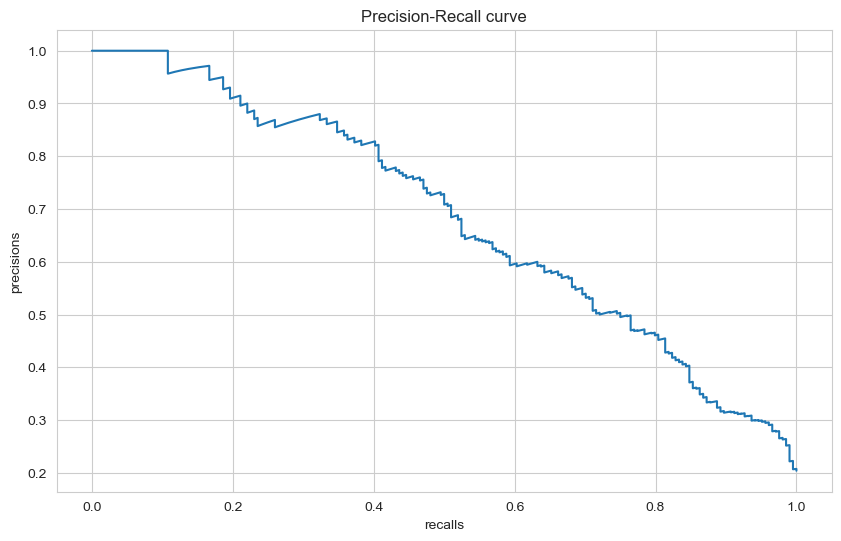

In [286]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [287]:
average_precision_score(y_test, y_pred_proba)

0.684008562187643

## Improving the Model

- The parameter we can optimize to improve the model is the learning_rate

### Increase The Learning Rate and Observe The Results

In [288]:
from tensorflow.keras.optimizers import Adam

In [289]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

# Farklı learning_rate değerleri denenebilir. 
# lr=0.01 => led to overfitting
# lr=0.005 => led to overfitting
# lr=0.003 => led to overfitting

In [290]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6541 - recall: 0.6320 - val_loss: 0.6286 - val_recall: 0.7845
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6033 - recall: 0.6731 - val_loss: 0.5816 - val_recall: 0.7459
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5696 - recall: 0.7010 - val_loss: 0.5132 - val_recall: 0.7845
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5136 - recall: 0.7379 - val_loss: 0.5225 - val_recall: 0.8453
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5000 - recall: 0.7476 - val_loss: 0.4022 - val_recall: 0.7680
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4908 - recall: 0.7331 - val_loss: 0.3932 - val_recall: 0.7569
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4767 - recall: 0.7561 - val_loss: 0.3845 - val_recall: 0.7680
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4084 - recall: 0.7942 - val_loss: 0.4482 - val_recall: 0.7845
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4017 - recall: 0.7984 - val_loss: 0.4669 - val_recall: 0.8011
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4053 - recall: 0.7972 - val_loss: 0.4803 - val_recall: 0.8122
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4111 - recall: 0.8033 - val_loss: 0.3908 - val_recall: 0.7238
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4109 - recall: 0.7978 - val_loss: 0.4075 - val_recall: 0.7403
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4050 - recall: 0.7996 - val_loss: 0.4294 - val_recall: 0.7901
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4076 - recall: 0.7984 - val_loss: 0.4304 - val_recall: 0.7956
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3863 - recall: 0.8136 - val_loss: 0.4619 - val_recall: 0.7735
Epoch 179/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3843 - recall: 0.8232 - val_loss: 0.4575 - val_recall: 0.7845
Epoch 180/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3850 - recall: 0.8172 - val_loss: 0.4588 - val_recall: 0.7845
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3852 - recall: 0.8281 - val_loss: 0.4631 - val_recall: 0.7901
Epoch 182/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3868 - recall: 0.8166 - val_loss: 0.4372 - val_recall: 0.7845
Epoch 183/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3828 - recall: 0.8226 - val_loss: 0.4398 - val_recall: 0.7624
Epoch 184/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3797 - recall: 0.8202 - val_loss: 0.4608 - val_recall: 0.7790
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3698 - recall: 0.8299 - val_loss: 0.4173 - val_recall: 0.7238
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3727 - recall: 0.8287 - val_loss: 0.5150 - val_recall: 0.8066
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3707 - recall: 0.8269 - val_loss: 0.4492 - val_recall: 0.7459
Epoch 240/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3707 - recall: 0.8329 - val_loss: 0.4638 - val_recall: 0.7624
Epoch 241/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3706 - recall: 0.8317 - val_loss: 0.4605 - val_recall: 0.7956
Epoch 242/300
64/64 [==============================] - 0s 4ms/step - loss: 0.3710 - recall: 0.8317 - val_loss: 0.4165 - val_recall: 0.7293
Epoch 243/300
64/64 [==============================] - 0s 4ms/step - loss: 0.3698 - recall: 0.8220 - val_loss: 0.4751 - val_recall: 0.7845
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3583 - recall: 0.8354 - val_loss: 0.4892 - val_recall: 0.7624
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3547 - recall: 0.8263 - val_loss: 0.4719 - val_recall: 0.7569
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3597 - recall: 0.8281 - val_loss: 0.4464 - val_recall: 0.7348
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3584 - recall: 0.8354 - val_loss: 0.4173 - val_recall: 0.7238
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3582 - recall: 0.8390 - val_loss: 0.4682 - val_recall: 0.7735


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check Precision-Recall Curve for the model

In [291]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.654,0.632,0.629,0.785
1,0.603,0.673,0.582,0.746
2,0.570,0.701,0.513,0.785
3,0.514,0.738,0.522,0.845
4,0.500,0.748,0.402,0.768
...,...,...,...,...
295,0.358,0.835,0.489,0.762
296,0.355,0.826,0.472,0.757
297,0.360,0.828,0.446,0.735
298,0.358,0.835,0.417,0.724


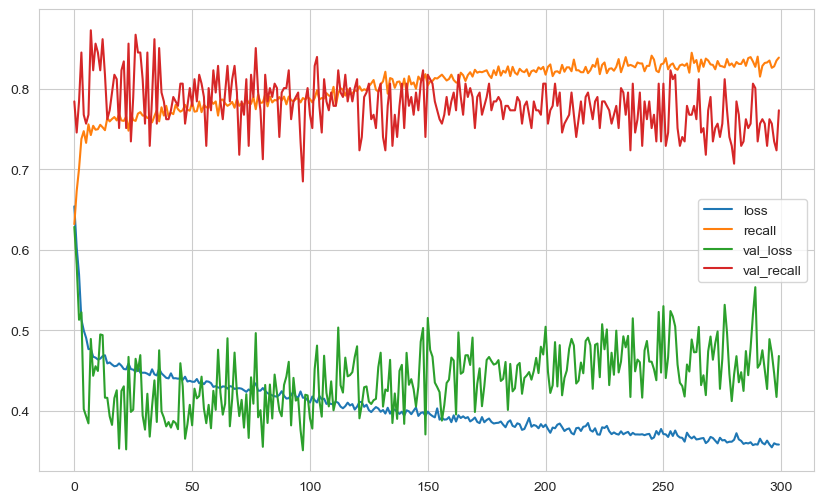

In [292]:
loss_df.plot()
plt.show()

In [293]:
model.evaluate(X_test, y_test, verbose=0)

[0.5066832900047302, 0.7156862616539001]

In [294]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5066832900047302
recall :  0.7156862616539001


In [295]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[625 171]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.46      0.72      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.77      0.79      1000



### Adding Dropout Layer
- Dropout is a way to handle overfitting seen in the chart above.

In [296]:
from tensorflow.keras.layers import Dropout

In [297]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [298]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6793 - recall: 0.5557 - val_loss: 0.6270 - val_recall: 0.6133
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6530 - recall: 0.6077 - val_loss: 0.6445 - val_recall: 0.8066
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6301 - recall: 0.6465 - val_loss: 0.6240 - val_recall: 0.7901
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6085 - recall: 0.6392 - val_loss: 0.5565 - val_recall: 0.6961
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5917 - recall: 0.6979 - val_loss: 0.4861 - val_recall: 0.6298
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5685 - recall: 0.6913 - val_loss: 0.4431 - val_recall: 0.6906
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5574 - recall: 0.7215 - val_loss: 0.4961 - val_recall: 0.8066
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4649 - recall: 0.7827 - val_loss: 0.4435 - val_recall: 0.8453
Epoch 120/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4705 - recall: 0.7615 - val_loss: 0.4300 - val_recall: 0.8398
Epoch 121/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4740 - recall: 0.7657 - val_loss: 0.4441 - val_recall: 0.8343
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4699 - recall: 0.7893 - val_loss: 0.4295 - val_recall: 0.8287
Epoch 123/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4708 - recall: 0.7748 - val_loss: 0.4805 - val_recall: 0.8564
Epoch 124/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4748 - recall: 0.7930 - val_loss: 0.4089 - val_recall: 0.7956
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4687 - recall: 0.7791 - val_loss: 0.4152 - val_recall: 0.8232
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4649 - recall: 0.7682 - val_loss: 0.4313 - val_recall: 0.8564
Epoch 179/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4681 - recall: 0.7827 - val_loss: 0.4313 - val_recall: 0.8287
Epoch 180/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4645 - recall: 0.7663 - val_loss: 0.4148 - val_recall: 0.8232
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4673 - recall: 0.7627 - val_loss: 0.4756 - val_recall: 0.8122
Epoch 182/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4677 - recall: 0.7530 - val_loss: 0.4186 - val_recall: 0.7845
Epoch 183/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4677 - recall: 0.7536 - val_loss: 0.4144 - val_recall: 0.8287
Epoch 184/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4660 - recall: 0.7791 - val_loss: 0.4186 - val_recall: 0.8066
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4624 - recall: 0.7827 - val_loss: 0.3653 - val_recall: 0.8122
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4630 - recall: 0.7694 - val_loss: 0.4060 - val_recall: 0.8453
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4578 - recall: 0.7845 - val_loss: 0.4313 - val_recall: 0.8453
Epoch 240/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4669 - recall: 0.7815 - val_loss: 0.4166 - val_recall: 0.8232
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4631 - recall: 0.7554 - val_loss: 0.4258 - val_recall: 0.8398
Epoch 242/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4588 - recall: 0.7772 - val_loss: 0.4341 - val_recall: 0.8343
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4592 - recall: 0.7694 - val_loss: 0.4199 - val_recall: 0.8343
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4666 - recall: 0.7579 - val_loss: 0.4314 - val_recall: 0.8232
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4598 - recall: 0.7730 - val_loss: 0.4345 - val_recall: 0.8343
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4638 - recall: 0.7845 - val_loss: 0.4239 - val_recall: 0.8564
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4638 - recall: 0.7609 - val_loss: 0.4271 - val_recall: 0.8232
Epoch 300/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4574 - recall: 0.7778 - val_loss: 0.4006 - val_recall: 0.8177


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check Precision - Recall Curve for the model

In [299]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.679,0.556,0.627,0.613
1,0.653,0.608,0.645,0.807
2,0.630,0.646,0.624,0.790
3,0.608,0.639,0.556,0.696
4,0.592,0.698,0.486,0.630
...,...,...,...,...
295,0.467,0.758,0.431,0.823
296,0.460,0.773,0.434,0.834
297,0.464,0.785,0.424,0.856
298,0.464,0.761,0.427,0.823


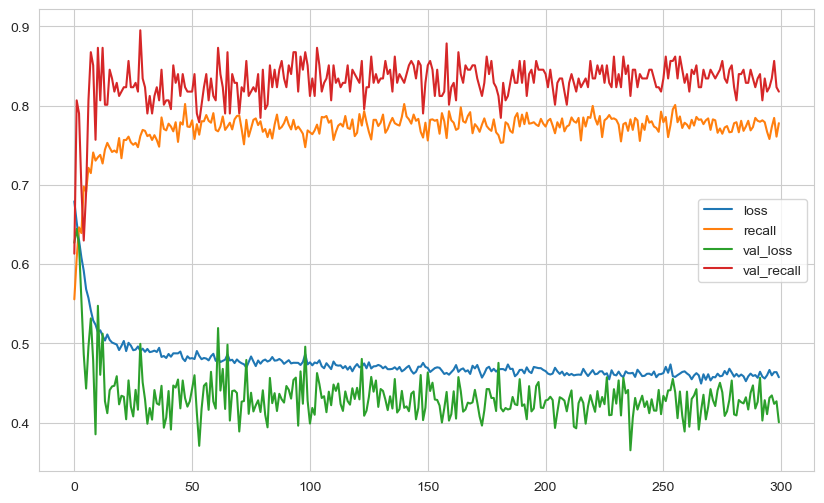

In [300]:
loss_df.plot()
plt.show()

In [301]:
model.evaluate(X_test, y_test, verbose=0)

[0.4385630190372467, 0.7450980544090271]

In [302]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4385630190372467
recall :  0.7450980544090271


In [303]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[615 181]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.46      0.75      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.77      0.78      1000



> When we use Dropout, we see that it learns better, so the overfit situation is blocked. It has upgraded Recall.

### Adding Early Stop

#### Monitor the "val_loss" as metric

In [304]:
from tensorflow.keras.callbacks import EarlyStopping

In [305]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [306]:
early_stop = EarlyStopping(monitor = "val_loss",
                           mode = "min", 
                           verbose = 1,
                           patience = 50, 
                           restore_best_weights = True)

In [307]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6706 - recall: 0.5757 - val_loss: 0.5914 - val_recall: 0.6188
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6401 - recall: 0.6386 - val_loss: 0.6150 - val_recall: 0.7569
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6120 - recall: 0.6604 - val_loss: 0.5639 - val_recall: 0.7072
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5951 - recall: 0.6562 - val_loss: 0.5181 - val_recall: 0.7127
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5794 - recall: 0.6749 - val_loss: 0.5049 - val_recall: 0.7514
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5560 - recall: 0.6792 - val_loss: 0.4329 - val_recall: 0.7348
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5436 - recall: 0.7288 - val_loss: 0.5030 - val_recall: 0.8564
Epoch 8/300
64/64 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check Precision-Recall Curve for the model

In [308]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.671,0.576,0.591,0.619
1,0.640,0.639,0.615,0.757
2,0.612,0.660,0.564,0.707
3,0.595,0.656,0.518,0.713
4,0.579,0.675,0.505,0.751
...,...,...,...,...
99,0.469,0.752,0.430,0.834
100,0.466,0.766,0.414,0.829
101,0.472,0.765,0.393,0.807
102,0.470,0.758,0.431,0.829


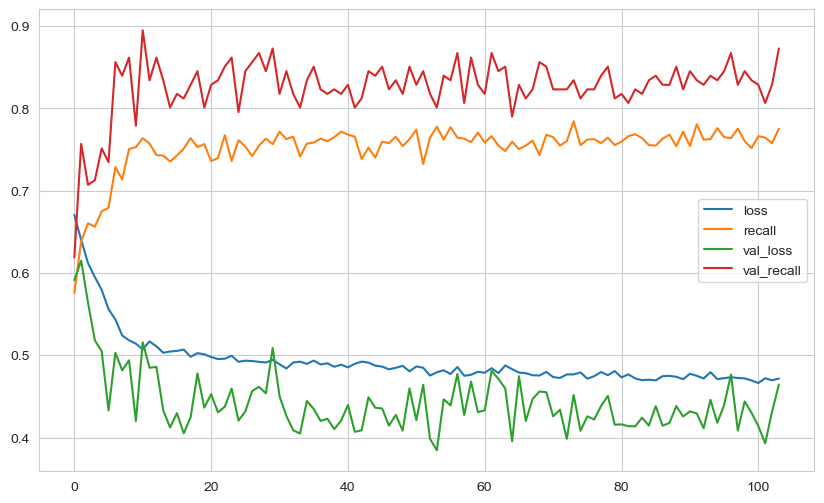

In [309]:
loss_df.plot()
plt.show()

In [310]:
model.evaluate(X_test, y_test, verbose=0)

[0.4263196885585785, 0.720588207244873]

In [311]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4263196885585785
recall :  0.720588207244873


In [312]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[648 148]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.50      0.72      0.59       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.83      0.80      0.81      1000



#### Monitor the "val_recall" as metric

In [313]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [314]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

# artık val_recall ve train_recall e bakacak loss değerleriyle ilgilenmeyecek.

In [315]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 9ms/step - loss: 0.6691 - recall: 0.5860 - val_loss: 0.6188 - val_recall: 0.7127
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6426 - recall: 0.6211 - val_loss: 0.6341 - val_recall: 0.7680
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6217 - recall: 0.5987 - val_loss: 0.5583 - val_recall: 0.6740
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6026 - recall: 0.6435 - val_loss: 0.5373 - val_recall: 0.7403
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5878 - recall: 0.6907 - val_loss: 0.4946 - val_recall: 0.7459
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5642 - recall: 0.6665 - val_loss: 0.4487 - val_recall: 0.7514
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5471 - recall: 0.7100 - val_loss: 0.4885 - val_recall: 0.8011
Epoch 8/300
64/64 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check Precision-Recall Curve for the model

In [316]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.669,0.586,0.619,0.713
1,0.643,0.621,0.634,0.768
2,0.622,0.599,0.558,0.674
3,0.603,0.643,0.537,0.740
4,0.588,0.691,0.495,0.746
5,0.564,0.666,0.449,0.751
6,0.547,0.710,0.488,0.801
7,0.534,0.697,0.513,0.840
8,0.535,0.725,0.512,0.851
9,0.522,0.717,0.462,0.829


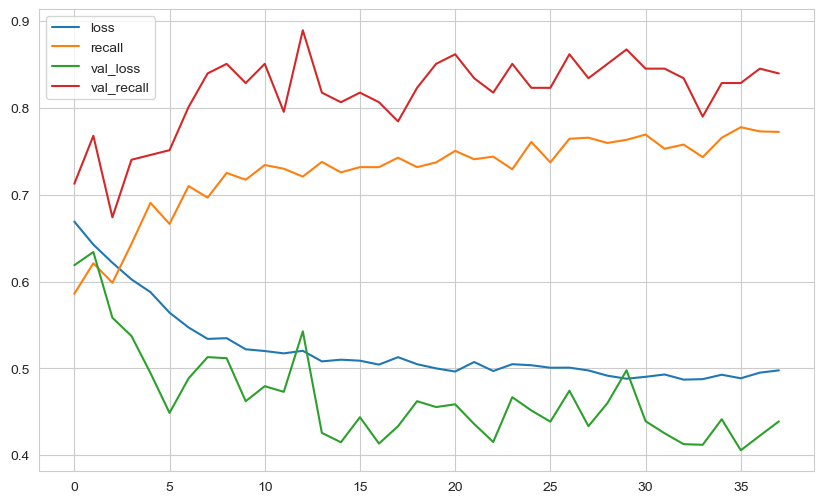

In [317]:
loss_df.plot()
plt.show()

In [318]:
model.evaluate(X_test, y_test, verbose=0)

[0.5716538429260254, 0.8382353186607361]

In [319]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5716538429260254
recall :  0.8382353186607361


In [320]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[508 288]
 [ 33 171]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       796
           1       0.37      0.84      0.52       204

    accuracy                           0.68      1000
   macro avg       0.66      0.74      0.64      1000
weighted avg       0.82      0.68      0.71      1000



> Number of false positives increased as Recall increased

## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [321]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

In [322]:
def build_classifier(optimizer, learn_rate, activation,dropout_rate):
    
    tf.random.set_seed(seed)

    model = Sequential()

    model.add(Dense(32, activation=activation, input_dim = X_train.shape[1]))
    model.add(Dropout(dropout_rate))

    model.add(Dense(16, activation=activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(8, activation=activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])

    return model


In [323]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [324]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1,epochs=200)

parameters = {'batch_size': [128,256],
              'optimizer': [Adam, RMSprop], 
#               [Adam, RMSprop, Adadelta, Nadam]
              'learn_rate': [0.001,0.003, 0.005],
#               'epochs' : [100, 500],
              'activation' : ['relu', 'tanh'],
              'dropout_rate' : [0.25, 0.5]
             }

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

In [325]:
grid_model.fit(X_train, y_train, class_weight=class_weights, callbacks = [early_stop])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 0.6951 - recall: 0.6241 - val_loss: 0.6899 - val_recall: 0.8729
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6856 - recall: 0.6441 - val_loss: 0.6720 - val_recall: 0.7127
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - recall: 0.7010 - val_loss: 0.6795 - val_recall: 0.8011
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6689 - recall: 0.7137 - val_loss: 0.6303 - val_recall: 0.6851
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6632 - recall: 0.7143 - val_loss: 0.6460 - val_recall: 0.7956
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6571 - recall: 0.7088 - val_loss: 0.5921 - val_recall: 0.6630
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6471 - recall: 0.6864 - val_loss: 0.6108 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001A8B6CF4BE0>,
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'batch_size': [128, 256], 'dropout_rate': [0.25, 0.5],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [326]:
grid_model.best_score_

0.9244315595997186

In [327]:
grid_model.best_params_

{'activation': 'relu',
 'batch_size': 256,
 'dropout_rate': 0.5,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [328]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
22,0.924,0.073,1,"{'activation': 'relu', 'batch_size': 256, 'dro..."
19,0.899,0.111,2,"{'activation': 'relu', 'batch_size': 256, 'dro..."
8,0.885,0.085,3,"{'activation': 'relu', 'batch_size': 128, 'dro..."
41,0.884,0.016,4,"{'activation': 'tanh', 'batch_size': 256, 'dro..."
23,0.873,0.080,5,"{'activation': 'relu', 'batch_size': 256, 'dro..."
9,0.864,0.110,6,"{'activation': 'relu', 'batch_size': 128, 'dro..."
11,0.859,0.032,7,"{'activation': 'relu', 'batch_size': 128, 'dro..."
47,0.856,0.036,8,"{'activation': 'tanh', 'batch_size': 256, 'dro..."
39,0.851,0.021,9,"{'activation': 'tanh', 'batch_size': 256, 'dro..."
20,0.843,0.077,10,"{'activation': 'relu', 'batch_size': 256, 'dro..."


In [329]:
y_pred = grid_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[243 553]
 [ 33 171]]
              precision    recall  f1-score   support

           0       0.88      0.31      0.45       796
           1       0.24      0.84      0.37       204

    accuracy                           0.41      1000
   macro avg       0.56      0.57      0.41      1000
weighted avg       0.75      0.41      0.44      1000



### Precision-Recall Curve and AP (Average Precision) for grid_model

32/32 [==============================] - 0s 1ms/step


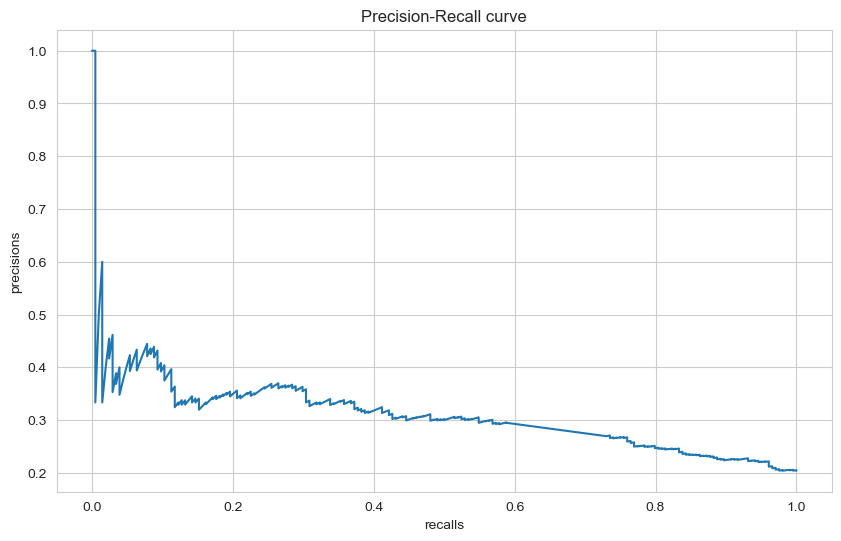

In [330]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [331]:
average_precision_score(y_test, y_pred_proba)

0.3093754206111745

# Final Model and Model Deployment

In [332]:
import pickle

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = seed)

In [334]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [335]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [336]:
pickle.dump(column_trans, open("column_trans", 'wb'))

In [337]:
grid_model.best_params_

{'activation': 'relu',
 'batch_size': 256,
 'dropout_rate': 0.5,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [338]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "max", 
                           verbose = 1, 
                           patience = 25, 
                           restore_best_weights = True)

model.fit(x = X_train, y = y_train, 
          validation_data = (X_test, y_test),
          batch_size = 128, 
          epochs = 500, 
          verbose = 1,
          class_weight=class_weights, 
          callbacks = [early_stop])

Epoch 1/500
71/71 [==============================] - 1s 5ms/step - loss: 0.6994 - recall: 0.3781 - val_loss: 0.6806 - val_recall: 0.3971
Epoch 2/500
71/71 [==============================] - 0s 3ms/step - loss: 0.6806 - recall: 0.4664 - val_loss: 0.6648 - val_recall: 0.5784
Epoch 3/500
71/71 [==============================] - 0s 3ms/step - loss: 0.6713 - recall: 0.4872 - val_loss: 0.6571 - val_recall: 0.6127
Epoch 4/500
71/71 [==============================] - 0s 3ms/step - loss: 0.6614 - recall: 0.5014 - val_loss: 0.6467 - val_recall: 0.6569
Epoch 5/500
71/71 [==============================] - 0s 3ms/step - loss: 0.6496 - recall: 0.5412 - val_loss: 0.6265 - val_recall: 0.5833
Epoch 6/500
71/71 [==============================] - 0s 3ms/step - loss: 0.6379 - recall: 0.5085 - val_loss: 0.6113 - val_recall: 0.6176
Epoch 7/500
71/71 [==============================] - 0s 3ms/step - loss: 0.6286 - recall: 0.5439 - val_loss: 0.5757 - val_recall: 0.5931
Epoch 8/500
71/71 [======================

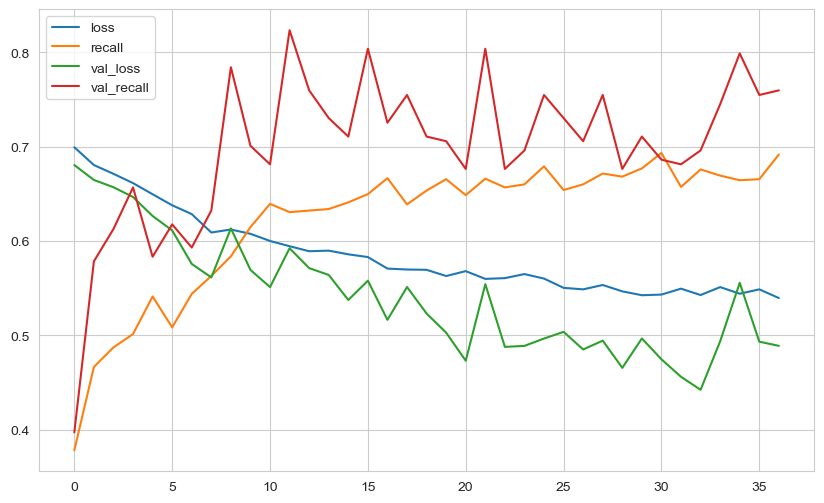

In [339]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [340]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.592341423034668
recall :  0.8235294222831726


In [341]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[519 277]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       796
           1       0.38      0.82      0.52       204

    accuracy                           0.69      1000
   macro avg       0.66      0.74      0.64      1000
weighted avg       0.82      0.69      0.72      1000



In [342]:
model.save('model_customer_churn.h5')

## Prediction

In [343]:
# Loading Model
from tensorflow.keras.models import load_model
model_churn = load_model('model_customer_churn.h5')
transformer_churn= pickle.load(open("column_trans", "rb"))

In [348]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880


In [349]:
single_customer = transformer_churn.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [350]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 23ms/step


array([[1]])

In [352]:
df["Exited"].iloc[0]

1

## Comparison with ML

In [353]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [355]:
clf1 = RandomForestClassifier(random_state=seed, class_weight="balanced")
clf2 = SVC(probability=True, random_state=seed, class_weight="balanced")
clf3 = LogisticRegression(random_state=seed, class_weight="balanced")

In [357]:
[10**(-2+i) for i in range(5)]

[0.01, 0.1, 1, 10, 100]

In [359]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2+i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2+i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [362]:
display(param1, param2, param3)

{'classifier__n_estimators': [10, 50, 100, 250],
 'classifier__max_depth': [5, 10, 20],
 'classifier': [RandomForestClassifier(class_weight='balanced', random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier': [SVC(class_weight='balanced', probability=True, random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__penalty': ['l1', 'l2'],
 'classifier': [LogisticRegression(class_weight='balanced', random_state=42)]}

In [366]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3]

In [367]:
pipeline

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=50, random_state=42))])

In [368]:
grid_model = GridSearchCV(pipeline, params, cv=5, n_jobs=-1,
                  scoring='recall').fit(X_train, y_train)

In [369]:
grid_model.best_params_

{'classifier': RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                        random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [370]:
grid_model.best_score_

0.7304953767811677

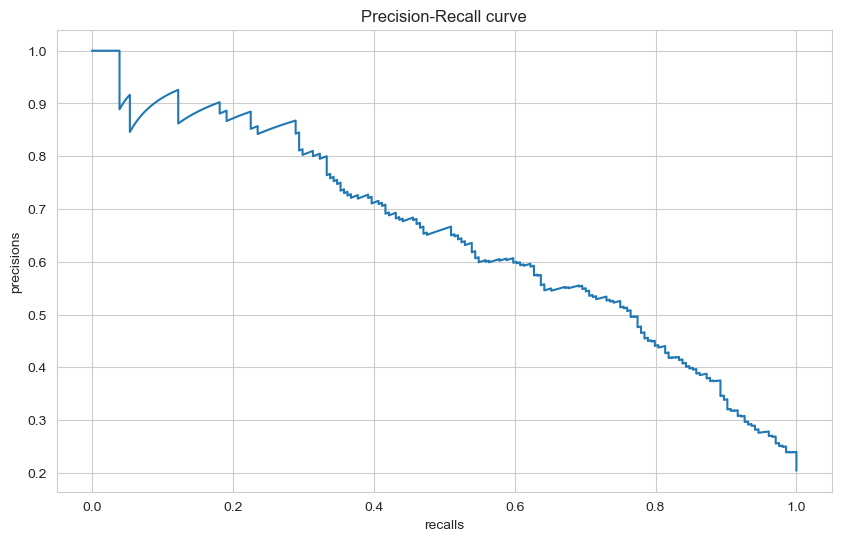

In [371]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [372]:
average_precision_score(y_test, y_pred_proba)

0.6501412159828897

In [374]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[634 162]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       796
           1       0.49      0.77      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.79      0.73      1000
weighted avg       0.84      0.79      0.81      1000

